# Color Identification in Images

Implement an image color detector which identifies all the colors in an
image or video.\
Below resources are just for references you can use any library/approach to
achieve the goal.\

By - Divya Gautam

In [74]:
#impoting libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (162, 311, 3)


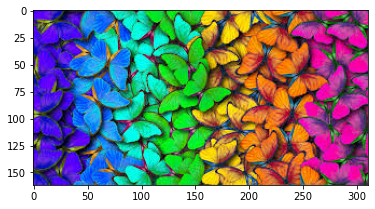

In [75]:
#reading an image
image = cv2.imread('download.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

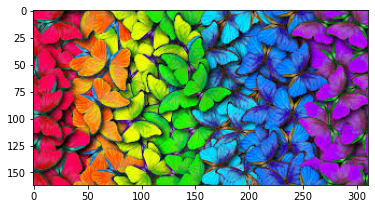

In [76]:
#converting  Blue Green Red (BGR) to Red Green Blue (RGB).
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Color Identification

In [77]:
#RGB to Hex Conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [78]:
#Read image in RGB color space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [79]:
#Get colors from an image
def get_colors(image, number_of_colors, show_chart):

    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([82.72723865, 89.49552806, 15.30243145]),
 array([197.55415083, 198.77864659, 107.80071616]),
 array([  6.89013316, 118.42083471, 177.08337646]),
 array([202.58221262,   9.59546481,  57.92716207]),
 array([157.66159268, 155.31805062,  24.83669067]),
 array([100.46161076,   3.86805957,  15.7257085 ]),
 array([ 9.4251893 , 16.63416658, 16.27917229]),
 array([ 5.50910603, 62.76618438, 81.71318221])]

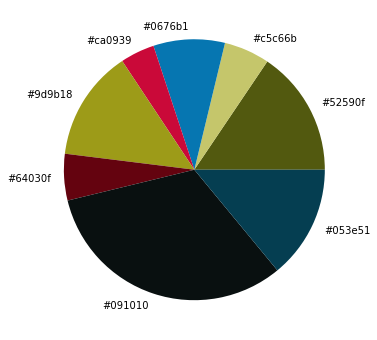

In [80]:
get_colors(get_image('0_9H74uSINU-qGHWz5.jpg'), 8, True)

 Pie chart appears with top 8 colors of the image.

## Search Images using color

In [81]:
#Getting all images
IMAGE_DIRECTORY = 'images'
COLORS = {
    'BLUE': [99,184,255],
    'GREEN': [0, 128, 0],
    'RED': [255,64,64]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

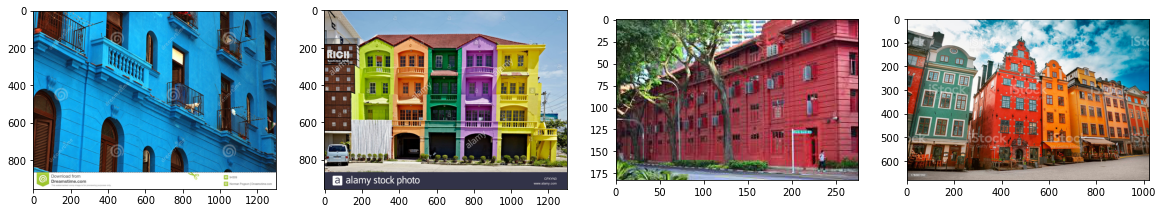

In [68]:
#Show all images
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [69]:
#Match Images with color
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [70]:
#Show selected images
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

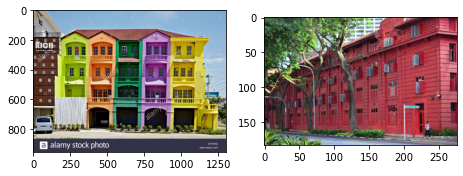

In [71]:
#Searching for Green
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

With the use of 'threshold' any images containing green shows up. The threshold basically defines how different can the colors of the image and selected color be.

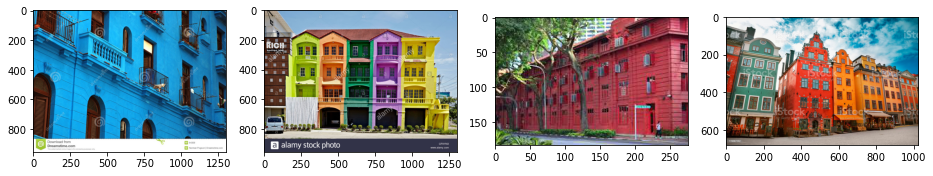

In [72]:
#Searching for Blue
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

With the use of 'threshold' any images containing blue shows up.

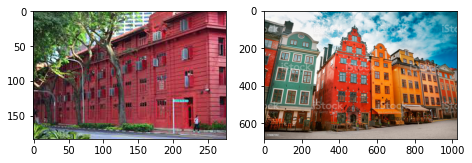

In [73]:
#Searching for Red
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

Hence extracted colors from an image using KMeans algorithm and then using this to search images based on colors.